In [11]:
import pandas as pd
import sklearn

Ajustar un modelo para el conjunto de datos. El conjunto de datos contiene información de una
población con la cual se intenta predecir si puede o no cobrar más de 50.000 dólares anuales.

In [12]:
#leer conjunto de datos
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital',
          'horas_por_semana','pais','ganancia']

data=pd.read_csv("./Practica Arboles/datos/adult.data",
                names=columnas,na_values=['?']
                )

display(data.head(5))



,edad,clase_de_trabajo,cantidad_personas,educacion,anios_de_estudio,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_de_capital,horas_por_semana,pais,ganancia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#datos faltantes 
data=data.dropna(axis=0)
display(data.isnull().sum())

edad                  0
clase_de_trabajo      0
cantidad_personas     0
educacion             0
anios_de_estudio      0
estado_civil          0
ocupacion             0
relaciones            0
raza                  0
sexo                  0
ganancia_capital      0
perdida_de_capital    0
horas_por_semana      0
pais                  0
ganancia              0
dtype: int64

In [14]:
data_complete=data.drop(labels=['cantidad_personas'],axis=1)
#display(data_complete.describe())
#display(data_complete.corr())
#display(data_complete.dtypes)
n_records=len(data_complete)
n_most_50=len(data_complete[data_complete['ganancia']=='>50K'])

print("total:",str(n_records))
print(">50:",n_most_50)

total: 30162
>50: 7508


In [17]:
def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)

Y=data_complete['ganancia']
X=data_complete.drop(labels=['ganancia'],axis=1)

X_dummies=function_dummies(X)
display(X_dummies.head(5))

Y = Y.str.replace('<=50K','0')
Y = Y.replace('>50K','1')

,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30
(genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó).
Indique que cantidad de casos quedaron para cada ambiente.

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_dummies,Y,
                                               test_size=0.3,
                                               random_state=5)


print(">50 train",y_train[y_train=='1'].count())
print("<=50 train",y_train[y_train=='0'].count())

print(">50 test",y_test[y_test=='1'].count())
print("<=50 test",y_test[y_test=='0'].count())

>50 train 5201
<=50 train 15912
>50 test 2307
<=50 test 6742


Ajuste el mejor modelo posible . Indique el modelo con todas sus variables.

In [19]:
from sklearn import tree
modelo=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

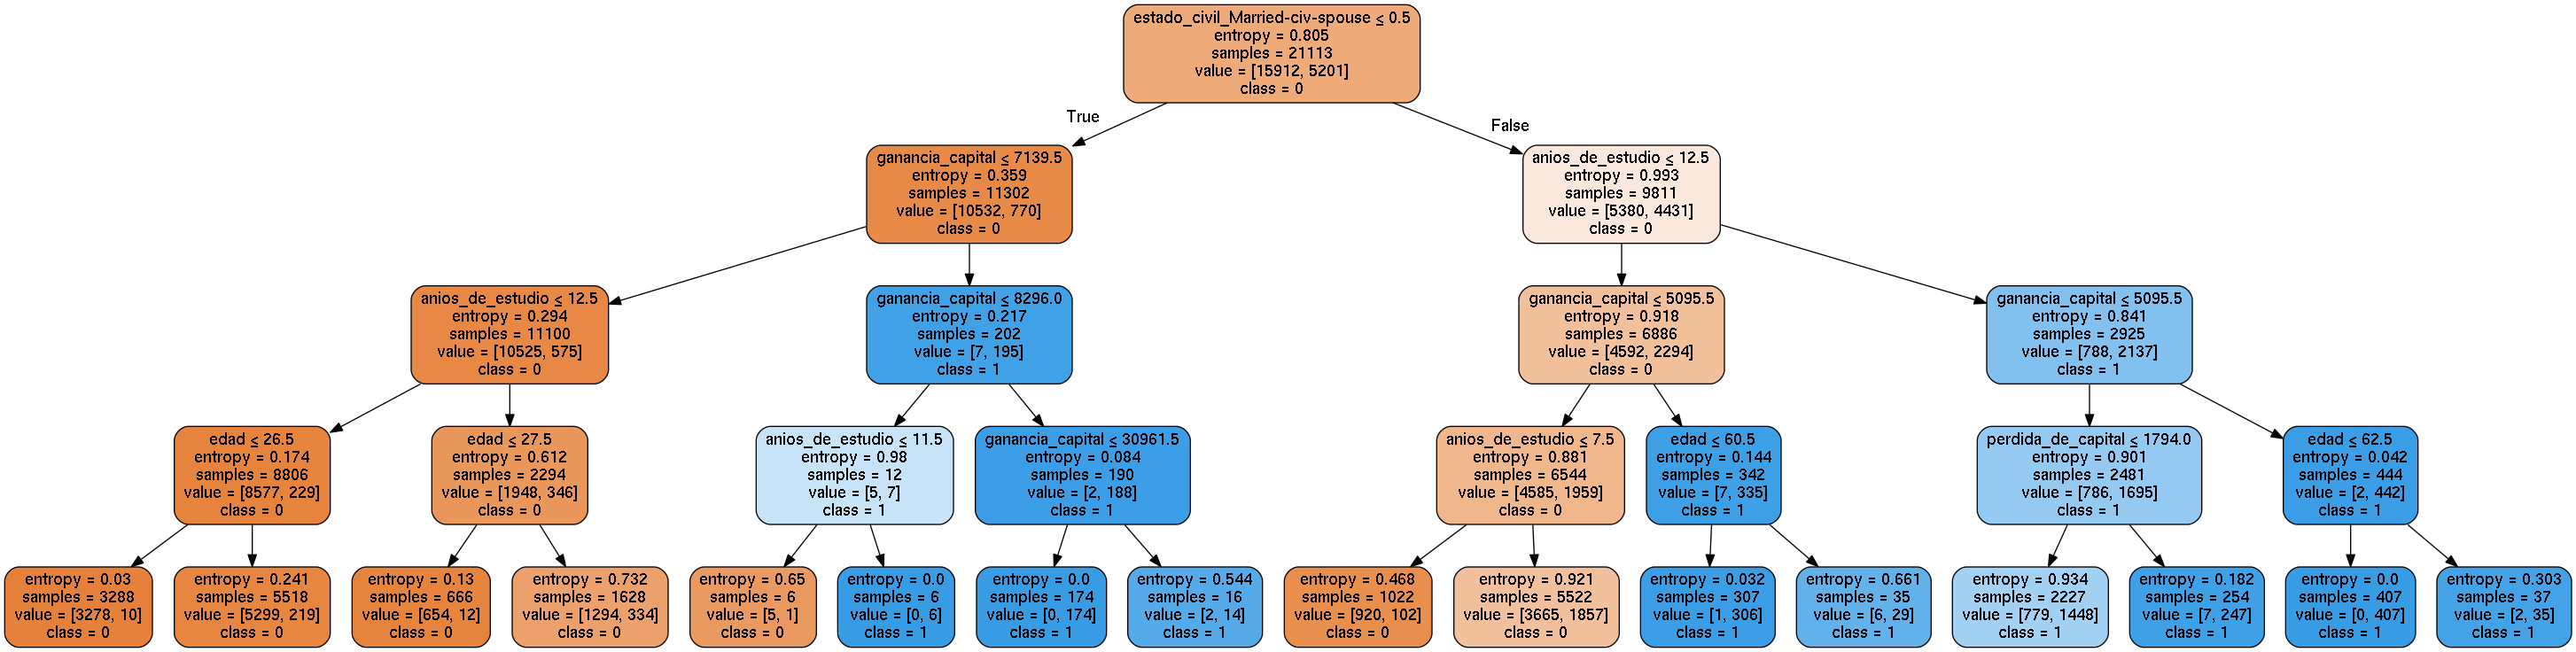

In [20]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

Calcular la perfomarnce y el AUC y el gráfico ROC en entrenamiento y validación
indicando también el total de casos de cada una de las clases.

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report

#predict test
y_pred_test=modelo.predict(X_test)
#predict train
y_pred_train=modelo.predict(X_train)

display('Test:',confusion_matrix(y_test,y_pred_test))

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_test).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

ac=(tp+tn)/(tp+tn+fp+fn)
print("performance test:", ac)
print("accuracy test:",accuracy_score(y_test, y_pred_test))
print("accuracy train:",accuracy_score(y_train, y_pred_train))





'Test:'

array([[6398,  344],
       [1137, 1170]])

verdaderos positivos: 1170
verdaderos negativos: 6398
falsos positivos: 344
falsos negativos: 1137
performance test: 0.836335506686
accuracy test: 0.836335506686
accuracy train: 0.842182541562


'              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      6742\n           1       0.77      0.51      0.61      2307\n\n   micro avg       0.84      0.84      0.84      9049\n   macro avg       0.81      0.73      0.75      9049\nweighted avg       0.83      0.84      0.82      9049\n'

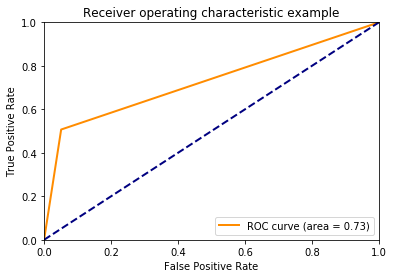

'              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      6742\n           1       0.77      0.51      0.61      2307\n\n   micro avg       0.84      0.84      0.84      9049\n   macro avg       0.81      0.73      0.75      9049\nweighted avg       0.83      0.84      0.82      9049\n'

In [40]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def my_roc(y_real,y_pred): 
    y_real = label_binarize(y_real, classes=['0', '1'])
    y_pred = label_binarize(y_pred, classes=['0', '1'])
    fpr, tpr, _ = roc_curve(y_real.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return (roc_auc)

my_roc(y_test, y_pred_test)
classification_report(y_test, y_pred_test)

In [113]:
probs_test = modelo.predict_proba(X_test)  
data_set_test=X_test.copy()

data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test
display(data_set_test.head(5))

,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
11617,37,11,0,0,60,0,0,0,1,0,...,0,0,0,1,0,0,0,0.336291,0.663709,1
5873,30,10,0,0,40,0,0,0,0,1,...,0,0,0,1,0,0,0,0.336291,0.663709,0
23485,37,9,0,0,50,0,0,1,0,0,...,0,0,0,1,0,0,0,0.336291,0.663709,0
23384,31,9,0,0,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0.336291,0.663709,1
1605,67,9,0,0,35,0,0,1,0,0,...,0,0,0,1,0,0,0,0.336291,0.663709,0


Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la
siguiente lógica. Entregue los resultados indicados:

In [120]:
#Al azar e indique la cantidad de individuos que
#cobran más de 50.000 dólares

X_test_75, X_25, y_test_75, y_25 = train_test_split(X_test, 
                             y_test, 
                            test_size = 0.25, 
                            random_state = 0)
    
#cantidad de individuos >50k al azar
print ("total 25%",y_25.count())
print(">50k test 25% azar",y_25[y_25=='1'].count())


#modelo

y_25_modelo=data_set_test.sort(['predicho_prob_1'],
                              ascending=[False])[1:y_25.count()]

print(">50 k 25% modelo:",
      len(y_25_modelo[y_25_modelo['real']=='1']))


    
    



















total 25% 2263
>50k test 25% azar 577
>50 k 25% modelo: 1416
